# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


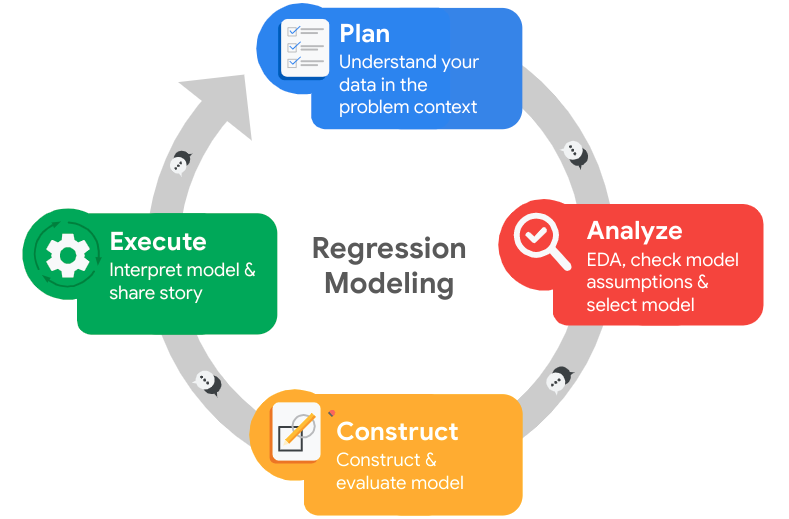

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[The stake holders for this project is HR department from Salifor Motors]
[We are trying to predict if an employee will quit or not using machine learning model]
[The dataset has 15,000 rows and 10 columns]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
!pip install --upgrade scikit-learn
!pip install --upgrade joblib
!pip install xgboost


In [3]:
# Import packages
### YOUR CODE HERE ### 
#Computing packages
import pandas as pd
import numpy as np

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,recall_score,precision_score,f1_score,RocCurveDisplay
from xgboost import XGBClassifier,plot_importance,plot_tree
import pickle




### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'number_project':'number_of_projects','average_montly_hours':'average_monthly_hours','time_spend_company':'tenure','Work_accident':'work_accident','Department':'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicated = df0.duplicated()
df0[duplicated == True].head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1=df0.drop_duplicates().reset_index(drop=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<AxesSubplot:xlabel='tenure'>

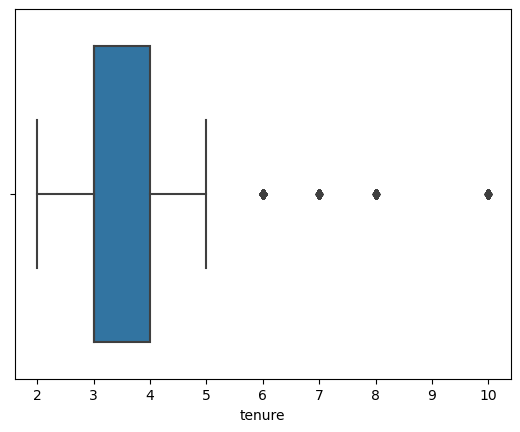

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x=df1['tenure'])

In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###


# Calculate the IQR (Interquartile Range)
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows containing outliers
outliers_rows = df1[(df1['tenure'] < lower_bound) | (df1['tenure'] > upper_bound)]

# Determine the number of rows containing outliers
num_outliers_rows = len(outliers_rows)

print(f"Number of rows containing outliers in 'tenure': {num_outliers_rows}")


Number of rows containing outliers in 'tenure': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
num_left = df1['left'][df1['left']==1].count()
print('number of people who left:' , num_left)
num_stay = df1['left'][df1['left']==0].count()
print('number of people who stayed:' , num_stay)
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))


number of people who left: 1991
number of people who stayed: 10000
0    0.833959
1    0.166041
Name: left, dtype: float64


we can see that 16.6% of people left which is a huge turnover rate

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Tenure who left based on Number of project they had to do')

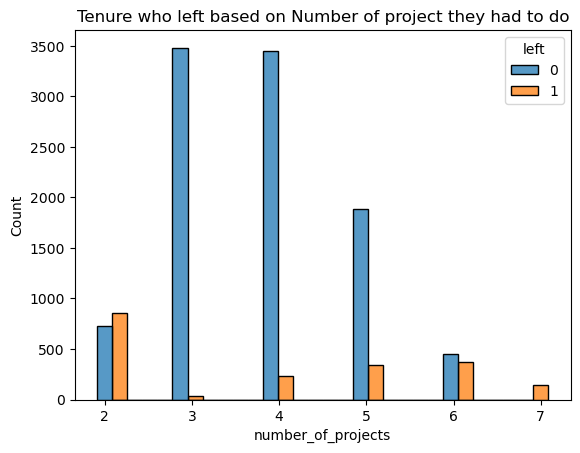

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
tenure_stay= df1['number_of_projects'][df1['left']==0]
tenure_left= df1['number_of_projects'][df1['left']==0]
sns.histplot(data=df1, x='number_of_projects', hue='left',multiple='dodge',shrink=2)
plt.title('Tenure who left based on Number of project they had to do')

In [17]:
print('The observed trend suggests that employee disengagement leading to attrition may be associated with a lack of challenging projects, as well as an excessive workload. It appears that employees may experience dissatisfaction and choose to leave when there is a dearth of meaningful projects, yet a high volume of assigned projects can also contribute to increased attrition. This highlights the importance of maintaining a balance in project allocation to foster employee engagement and retention within the organization but another thing to consider is they got fired becuase of not being able to accomplished assigned projects')

The observed trend suggests that employee disengagement leading to attrition may be associated with a lack of challenging projects, as well as an excessive workload. It appears that employees may experience dissatisfaction and choose to leave when there is a dearth of meaningful projects, yet a high volume of assigned projects can also contribute to increased attrition. This highlights the importance of maintaining a balance in project allocation to foster employee engagement and retention within the organization but another thing to consider is they got fired becuase of not being able to accomplished assigned projects


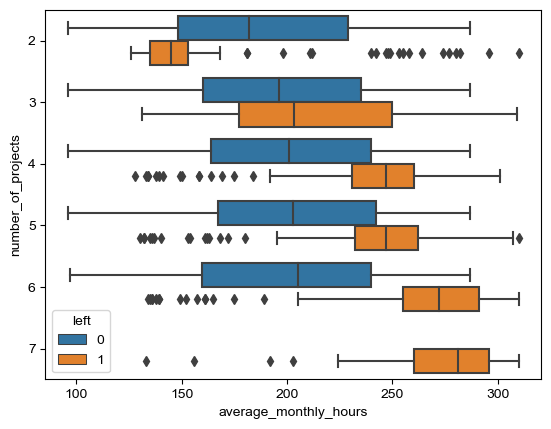

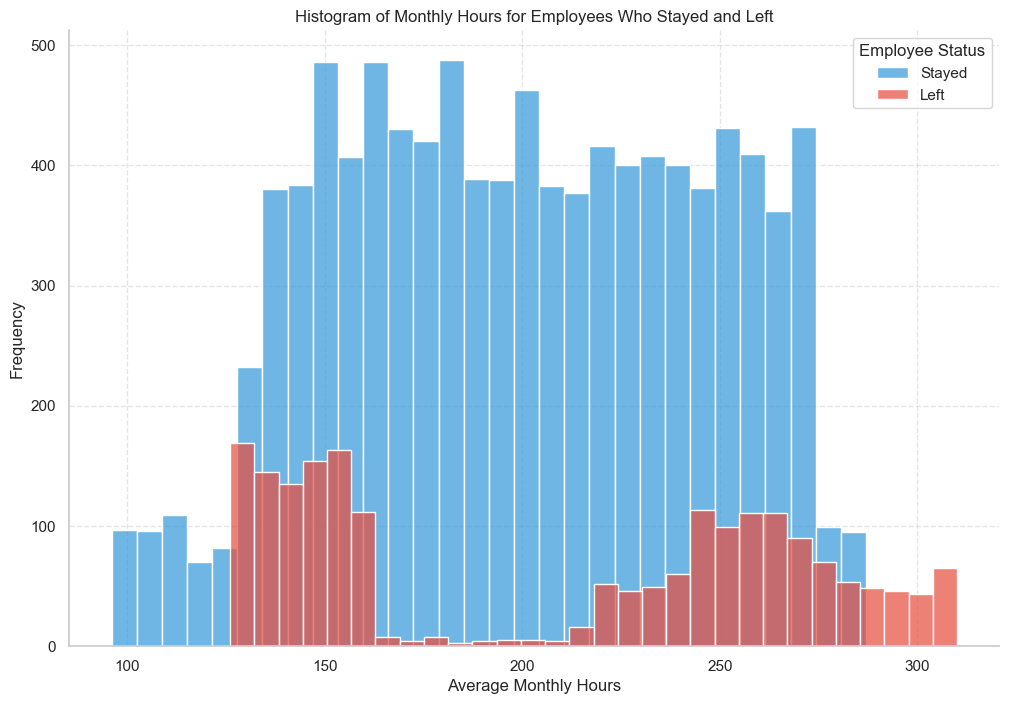

In [18]:
# Create a plot as needed
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df1, x='average_monthly_hours', y = 'number_of_projects', hue ='left', orient='h')
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

# Histogram for employees who stayed (left=0)
sns.histplot(df1[df1['left'] == 0]['average_monthly_hours'], bins=30, color='#3498db', label='Stayed', kde=False, alpha=0.7)

# Histogram for employees who left (left=1)
sns.histplot(df1[df1['left'] == 1]['average_monthly_hours'], bins=30, color='#e74c3c', label='Left', kde=False, alpha=0.7)

plt.title('Histogram of Monthly Hours for Employees Who Stayed and Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')

# Customize legend
plt.legend(title='Employee Status', loc='upper right')

# Customize grid and spines
sns.despine()
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()


After analyzing the data, it's noticeable that employees who left the company were concentrated in two distinct ranges of average monthly working hours: approximately 75-150 hours and 250-300 hours. The former suggests a potential dissatisfaction due to lower engagement or workload, while the latter raises concerns about overworking. The observation indicates that an average monthly working hours range of 250-300 may have contributed to employee attrition, highlighting the importance of maintaining a balanced workload for employee satisfaction and retention

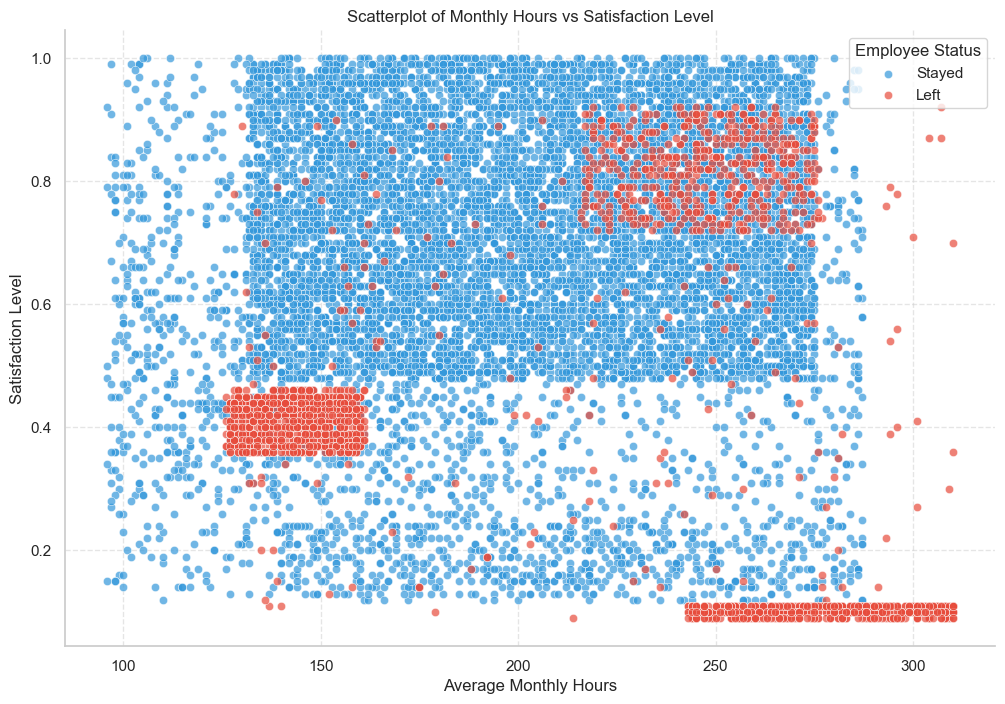

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# Set a beautiful style for the plot
sns.set(style="whitegrid")

# Define a color palette
palette = {0: '#3498db', 1: '#e74c3c'}

plt.figure(figsize=(12, 8))

# Scatterplot for employees who stayed (left=0)
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', data=df1[df1['left'] == 0], label='Stayed', color=palette[0], alpha=0.7)

# Scatterplot for employees who left (left=1)
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', data=df1[df1['left'] == 1], label='Left', color=palette[1], alpha=0.7)

plt.title('Scatterplot of Monthly Hours vs Satisfaction Level')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')

# Customize legend
plt.legend(title='Employee Status', loc='upper right')

# Customize grid and spines
sns.despine()
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

"The scatterplot highlights a noteworthy trend where individuals working consistently over 300 hours per month exhibit a satisfaction level of 0, indicating a potential correlation between extended working hours and decreased job satisfaction. This suggests that employees working an average of 13.6 hours per day may find the workload challenging and, consequently, have opted to leave the company.

Additionally, the plot reveals a subgroup of employees who departed while maintaining a more conventional monthly workload, around 150 hours. Despite the seemingly reasonable working hours, these individuals reported a satisfaction level around 0.4. The nuanced nature of their dissatisfaction makes it challenging to pinpoint specific factors. However, it raises the possibility that perceived pressure from colleagues who consistently work longer hours may contribute to a sense of professional strain, potentially influencing their decision to leave."

The analysis identifies a distinct group of employees who chose to leave despite maintaining a monthly working hour range of 200-250. Notably, this cohort exhibited a relatively high satisfaction level. This suggests that factors influencing their decision to leave may not be directly attributed to the number of working hours. Further investigation is warranted to explore additional aspects, such as organizational culture, career development opportunities, or personal circumstances, which might have contributed to their departure.

And We can see that people around and above 0.9 satisfaction level do not leave at all. 

In [20]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


We can see that people who left has mean satisfaction level of 0.41 while people who say has 0.69 which is reasonable.

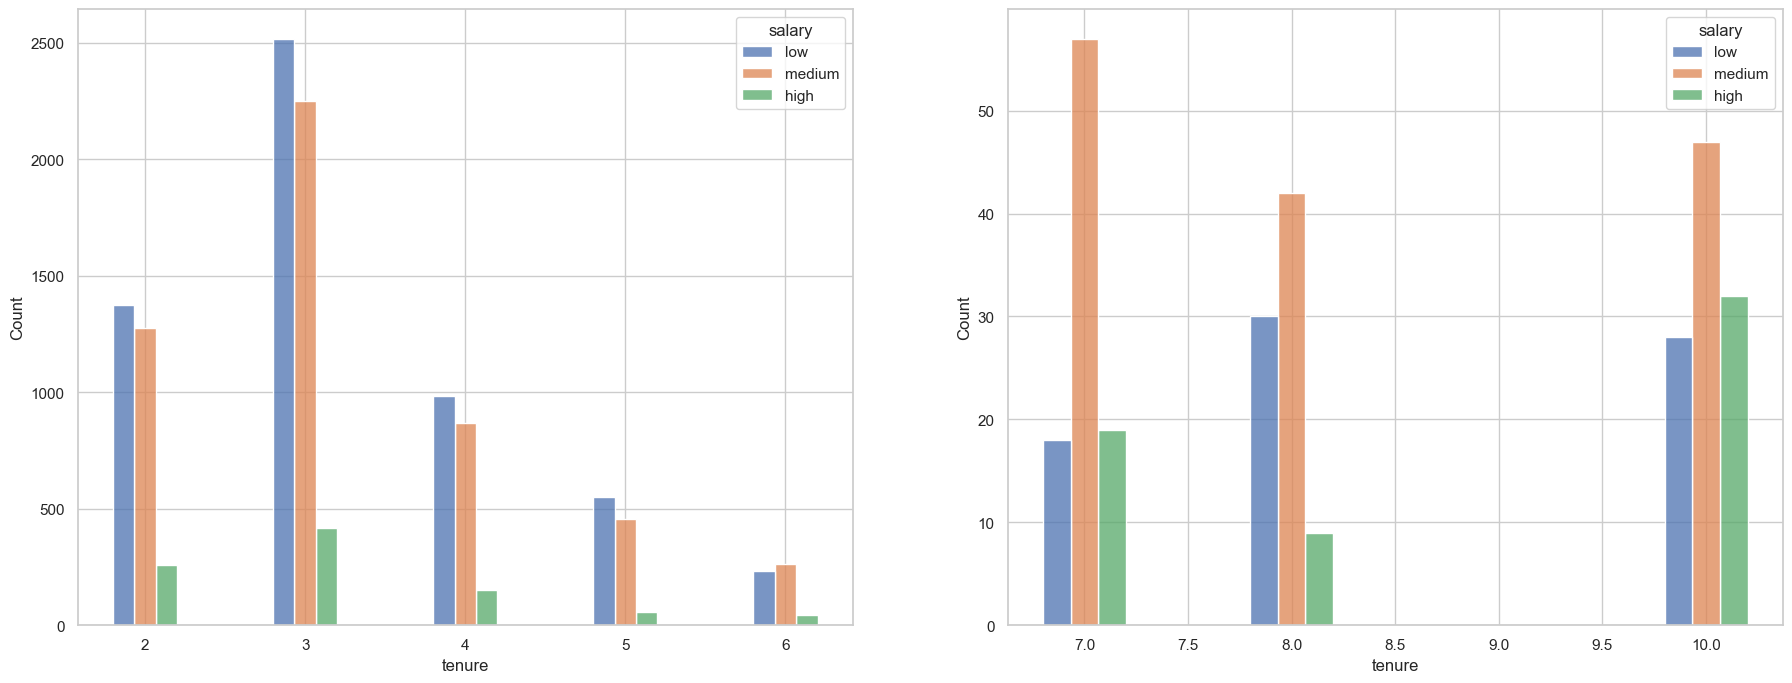

In [21]:
fig, ax = plt.subplots(1,2,figsize=(22,8))
tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure']>6]
sns.histplot(data = tenure_short, x='tenure',hue='salary',discrete=1,hue_order=['low','medium','high'],multiple='dodge',shrink=.4,ax=ax[0])
sns.histplot(data=tenure_long, x='tenure',hue='salary',discrete=1,hue_order=['low','medium','high'],multiple='dodge', shrink=.4, ax=ax[1])
plt.show()

The depicted figure elucidates a compelling trend wherein long-term employees not only occupy the top echelons of compensation but also contribute to a balanced salary distribution, encompassing both moderate and lower salary tiers.

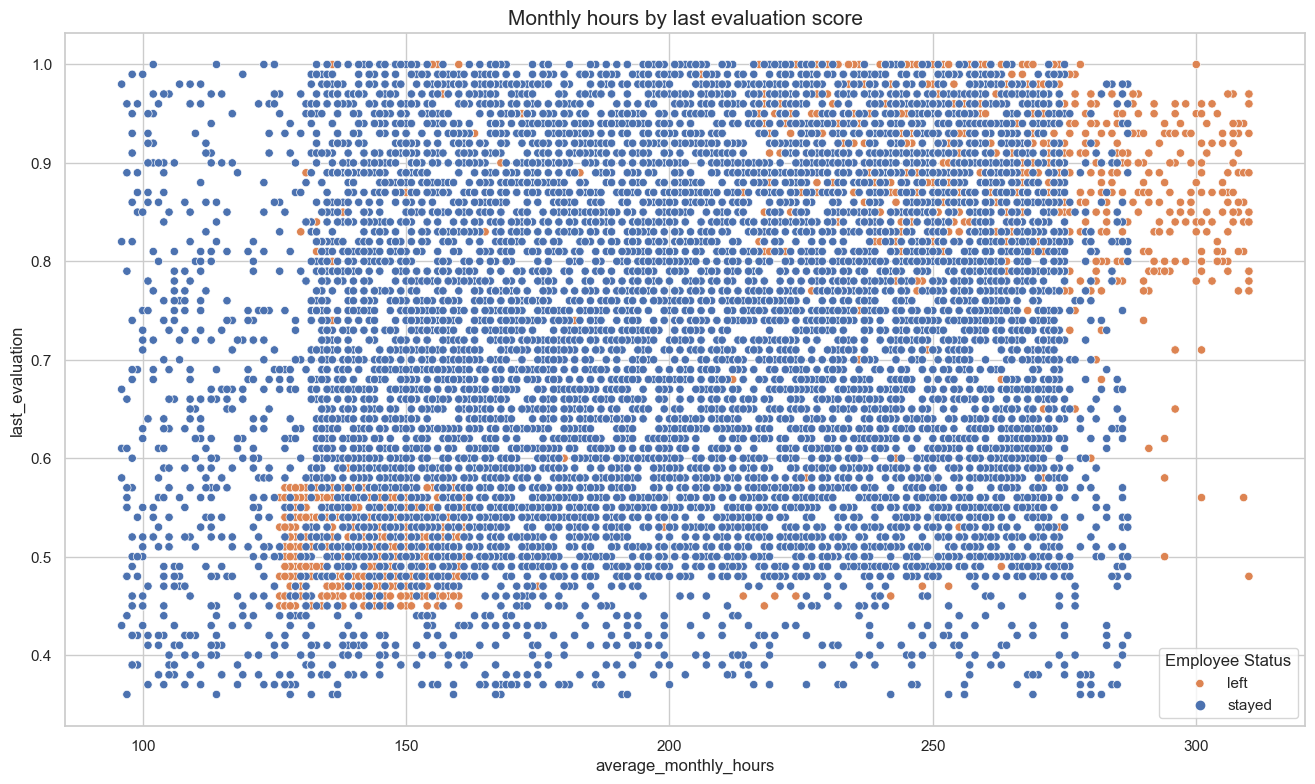

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (16,9))
sns.scatterplot(data=df1, x='average_monthly_hours',y='last_evaluation',hue='left')
plt.legend(title='Employee Status',labels=['left','stayed'])
plt.title('Monthly hours by last evaluation score',fontsize=15)
plt.show()


In this figure, employees working approximately 300 hours tend to have high last_evaluation scores, suggesting a positive correlation. Conversely, those with evaluation scores below 0.6 seem to underperform, possibly leading to termination

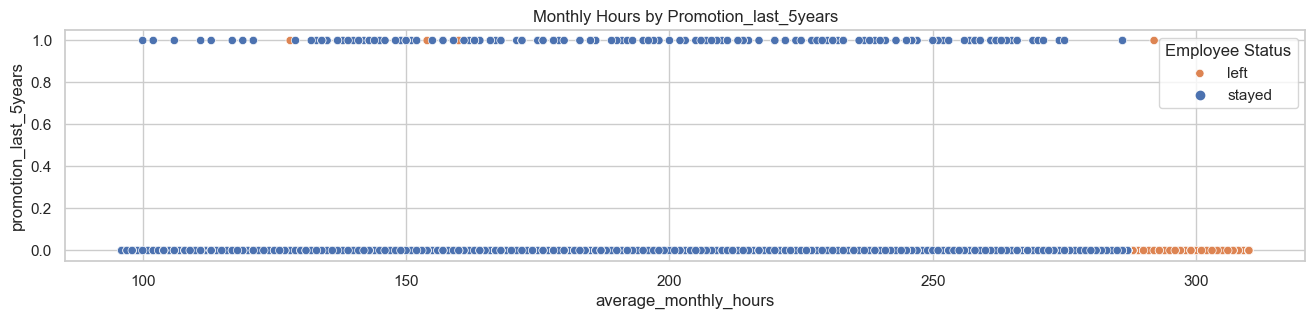

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16,3))
sns.scatterplot(data=df1,x='average_monthly_hours',y='promotion_last_5years',hue='left')
plt.title('Monthly Hours by Promotion_last_5years')
plt.legend(title='Employee Status',labels=['left','stayed'])
plt.show()

This plot reveals that many departing employees weren't promoted in the last 5 years. They often worked around 300 hours, indicating significant effort for promotion attempts that unfortunately didn't materialize, potentially contributing to their decision to leave.

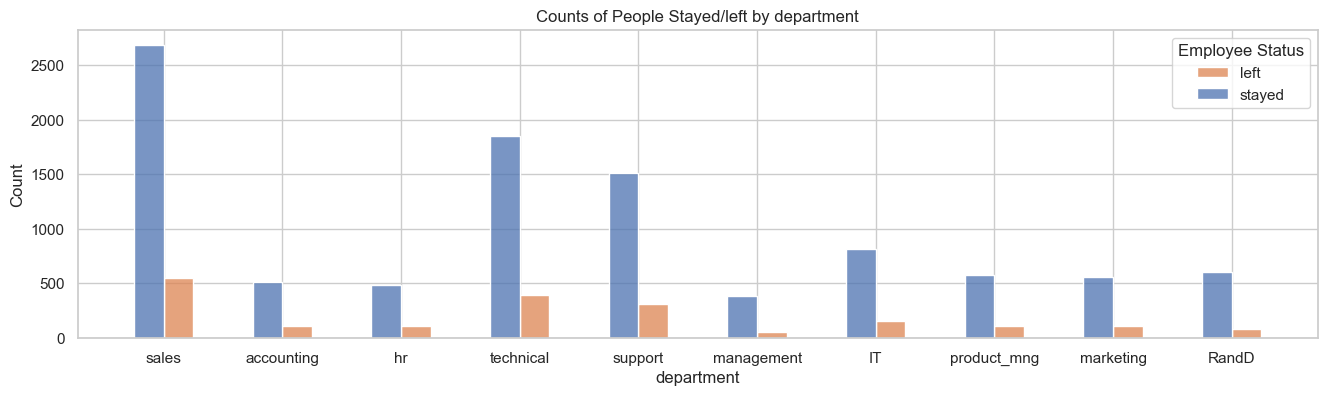

In [24]:
plt.figure(figsize=(16,4))
sns.histplot(data=df1,x='department',hue='left',multiple='dodge',shrink=.5)
plt.legend(title='Employee Status', labels=['left','stayed'])
plt.title('Counts of People Stayed/left by department')
plt.show()

The proportion of employees who left and those who stayed is fairly consistent across most departments. So there is no responsibility in just one specific department for high turnover rate.

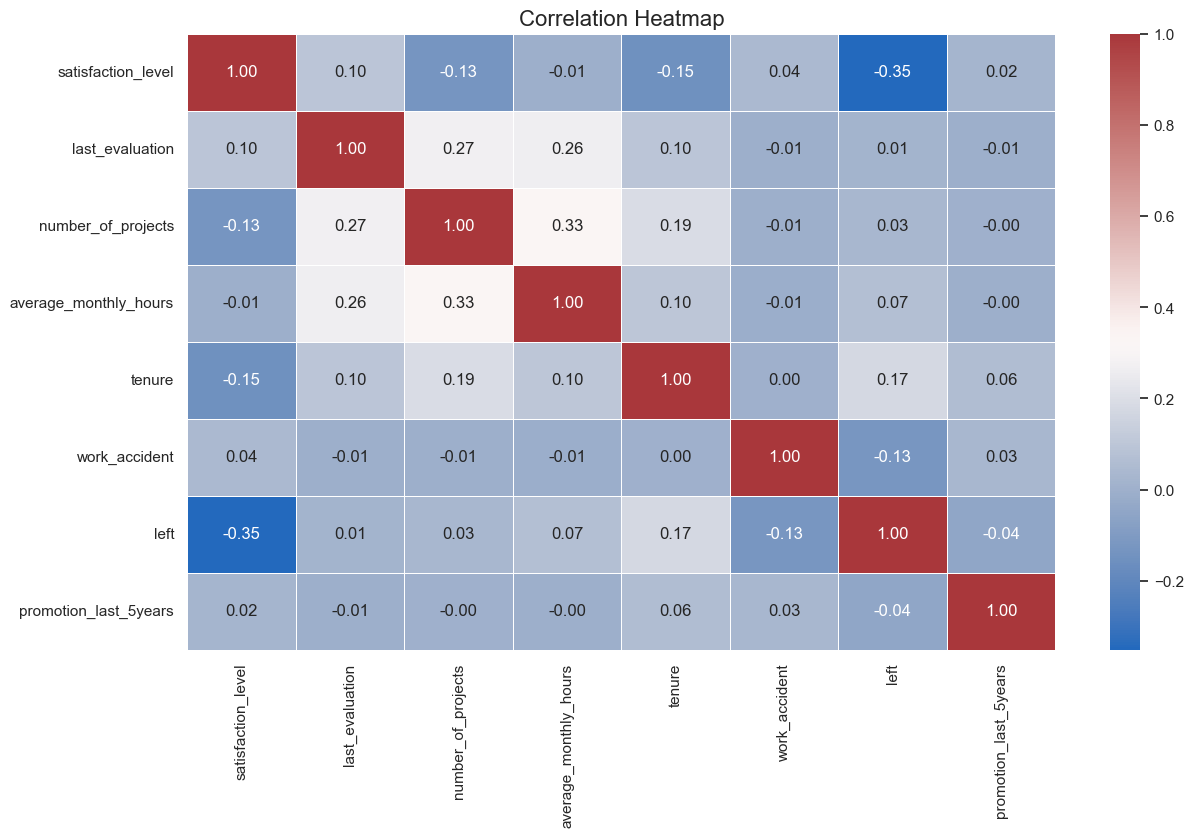

In [25]:
plt.figure(figsize=(14, 8))
# Choose a color palette, for example, "coolwarm"
cmap = sns.color_palette("vlag", as_cmap=True)

# Create the heatmap with the chosen color palette
heatmap = sns.heatmap(df1.corr(), annot=True, cmap=cmap, fmt=".2f", linewidths=.5)

# Add a title
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()


The correlation heatmap highlights significant insights. Employee departures exhibit a strong negative correlation with satisfaction_level, indicating a potential link between lower satisfaction and attrition. Additionally, positive correlations are observed with the number of projects, average_monthly_hours, and tenure, suggesting that these factors might contribute to employee exits.

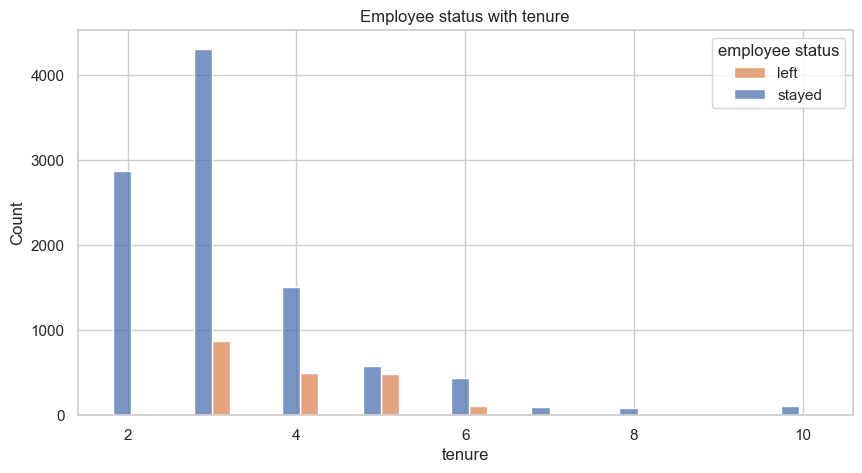

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data=df1, x= 'tenure',hue='left',multiple='dodge',shrink=5)
plt.legend(title='employee status', labels=['left','stayed'])
plt.title('Employee status with tenure')
plt.show()

### Insights

"This analysis indicates that employees are leaving due to prolonged working hours, inadequate promotions aligned with evaluation scores, resulting in lower satisfaction levels. Interestingly, individuals with over 6 years in the company show a lower tendency to leave."

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_of_projects     11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


No i didn't notice anything odd.

I choose 'satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'department', 'salary' as independent 
       variables.
      

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We'll have to predict whether employees would leave or not. So it has two possible outcomes and can identify as binary classification task.  

### Identify the types of models most appropriate for this task.

Since it is categorical, We can use logistic regression or Tree based machine learning model. We'll employ both and see if one is better than other.

Before modeling we have some steps to do. First 'salary' and 'department' Columns needs to convert as they are non-numeric variables. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [67]:
df = df1.copy()
df['salary'] = df['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes
df = pd.get_dummies(df, drop_first=False)
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


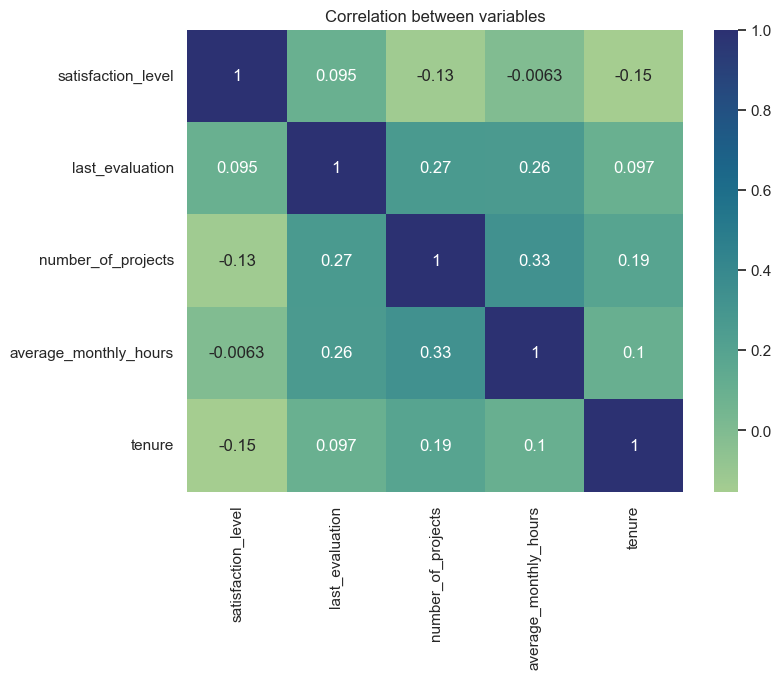

In [68]:
### YOUR CODE HERE ###
plt.figure(figsize=(8,6))
sns.heatmap(df[['satisfaction_level','last_evaluation','number_of_projects','average_monthly_hours','tenure']].corr(),annot=True, cmap="crest")
plt.title('Correlation between variables')
plt.show()

You can see there is not strong correlation between independent variables. No severe multicollinearity among X variables. Which means suitable for logistic regression.

But we'll have to manage outliers we detected in 'tenure'

In [69]:
df = df[(df['tenure']>= lower_bound)&(df['tenure']<= upper_bound)]

In [70]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


We are now ready for selecting dependent y variable. Also define X variables.

In [71]:
y = df['left']
X = df.drop('left',axis=1)
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [73]:
log_clf = LogisticRegression(random_state=42).fit(X_train,y_train)

/Users/squall/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
y_pred = log_clf.predict(X_test)

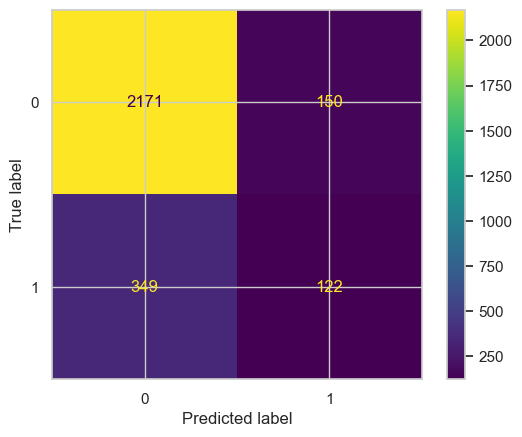

In [75]:
# Helper function to display confusion matrix
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(values_format='')
    plt.show()

# Display the confusion matrix
conf_matrix_plot(log_clf, X_test, y_test)



In [76]:
clf_report = classification_report(y_test,y_pred,target_names=['People who would not leave','People who would leave'])
print(clf_report)

                            precision    recall  f1-score   support

People who would not leave       0.86      0.94      0.90      2321
    People who would leave       0.45      0.26      0.33       471

                  accuracy                           0.82      2792
                 macro avg       0.66      0.60      0.61      2792
              weighted avg       0.79      0.82      0.80      2792



We got many more true negative compare to other FN,FP,TP. So we can accurately predict people who would not leave but what we really need to know is people who would leave. So the precision,recall,f1 and support scores are relatively low. Which means we should try Tree based machine learning models. 

In [77]:
xgb = XGBClassifier(objective='binary:logistic',random_state=0)

In [78]:
cv_params = {'max_depth': [4, 5, 6, 7, 8],
             'min_child_weight': [1, 2, 3, 4, 5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]}

In [85]:
scoring = ['accuracy', 'precision', 'recall', 'f1']



In [86]:
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, refit='precision')

In [87]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: user 5min 35s, sys: 1min 54s, total: 7min 30s
Wall time: 1min 1s


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [91]:
path = '/Users/squall/Documents/'

In [92]:

def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

write_pickle(path, xgb_cv, 'model_xgb0')

In [93]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

read_pickle(path, 'model_xgb0')

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [94]:
print('precision score for y_train XGB CV: ', xgb_cv.best_score_)

precision score for y_train XGB CV:  0.986286317609536


In [95]:
xgb_cv_preds = xgb_cv.predict(X_test)
print('F1 score XGB model: ', f1_score(y_test, xgb_cv_preds))
print('Recall score XGB model: ', recall_score(y_test, xgb_cv_preds))
print('Precision score XGB model: ', precision_score(y_test, xgb_cv_preds))
print('Accuracy score XGB model: ', accuracy_score(y_test, xgb_cv_preds))

F1 score XGB model:  0.9618320610687023
Recall score XGB model:  0.9363057324840764
Precision score XGB model:  0.9887892376681614
Accuracy score XGB model:  0.9874641833810889


In [96]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 125}

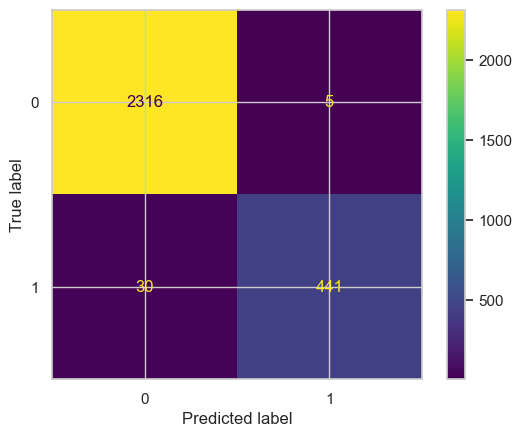

In [97]:
conf_matrix_plot(xgb_cv, X_test, y_test)

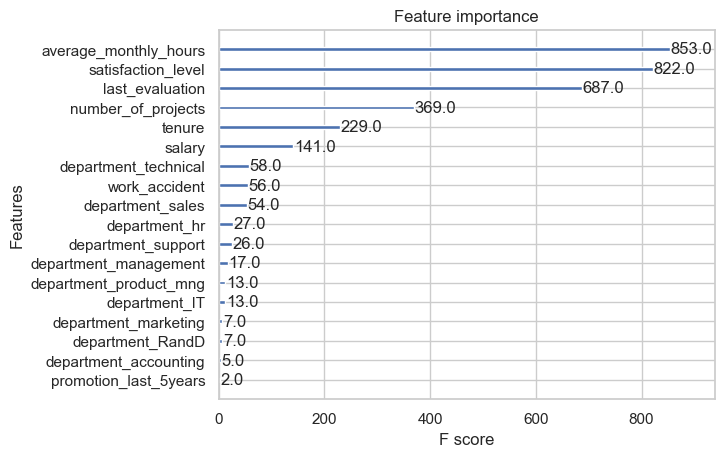

In [98]:
plot_importance(xgb_cv.best_estimator_)
plt.show()

so XGBoost model has better scores over logistic regression model. So we can select XGBoost as better fitting model.But the scores are very high which is not very realistic for real life usage. We should do some feature engineering. We suspect 'average_monthly_hour' is the issue here because employees who already decided to quit or asked to leave might have fewer working hours. So we will try to create 'overworked' column which indicate if someone work over average working hours.

In [99]:
df2 = df.copy()
df2['overworked'] = df2['average_monthly_hours']


In [100]:
print('Max hours:',df2['overworked'].max())
print('Min hours:',df2['overworked'].min())
print('Avg hours:',df2['overworked'].mean())
print('Median hours:',df2['overworked'].median())
df2.head()

Max hours: 310
Min hours: 96
Avg hours: 200.14453299901496
Median hours: 199.0


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,157
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,272
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,223
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,159
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,153


Average working hour of a worker should be 160 to 180 hours per month, But the median working hours and mean working hours of this company is way higher so employees are overworking, we'll assign employee who had to work over 180 hours as overworked. Also we'll drop the satisfaction_level which is pretty self-explanatory. 

In [101]:
df2['overworked'] = (df2['overworked'] > 180 ).astype(int)

In [102]:
df2['overworked'].head()
df2 = df2.drop('satisfaction_level',axis=1)


In [103]:
df2= df2.drop('average_monthly_hours',axis=1)
df2.head()

,last_evaluation,number_of_projects,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.50,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [104]:
y = df2['left']
X = df2.drop('left',axis=1)
X.head()

,last_evaluation,number_of_projects,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.88,7,4,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.50,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state =42)

In [111]:
#instantiate model
cv_params = {'learning_rate': [0.1],
 'max_depth': [7],
 'min_child_weight': [1],
 'n_estimators': [75]} 
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [112]:
xgb_cv_final = GridSearchCV(xgb, cv_params, scoring=scoring, refit='precision')

In [113]:
xgb_cv_final.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [7],
                         'min_child_weight': [1], 'n_estimators': [75]},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [114]:
xgb_cv_final.best_score_

0.9180828076317556

In [115]:
xgb_cv_final_preds = xgb_cv_final.predict(X_test)


In [116]:
print('F1 score final XGB model: ', f1_score(y_test, xgb_cv_final_preds))
print('Recall score final XGB model: ', recall_score(y_test, xgb_cv_final_preds))
print('Precision score final XGB model: ', precision_score(y_test, xgb_cv_final_preds))
print('Accuracy score final XGB model: ', accuracy_score(y_test, xgb_cv_final_preds))

F1 score final XGB model:  0.9046087888531619
Recall score final XGB model:  0.8959660297239915
Precision score final XGB model:  0.9134199134199135
Accuracy score final XGB model:  0.9681232091690545


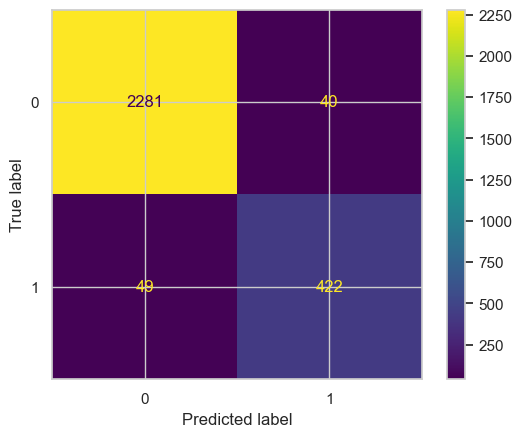

In [117]:
conf_matrix_plot(xgb_cv_final, X_test, y_test)

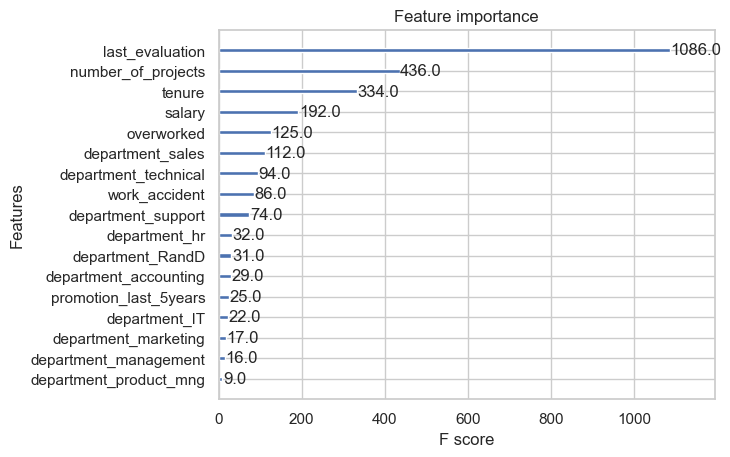

In [118]:
plot_importance(xgb_cv_final.best_estimator_)
plt.show()

The barplot show that in this model, last_evaluation, number_projects, tenure, and overworked are the most important features in that order. These variables are most helpful for outcome variable, 'employee turnover'

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Logistic Regression
The logistic regression model has precision of 82%, recall of 86%, f1 score of 94% and accuracy of 90%.

#### XGBoost Machine Learning

##### Before Feature Engineering 
F1 score XGB model:  96.1%
Recall score XGB model:  93.6%
Precision score XGB model:  98.8%
Accuracy score XGB model:  98.7%

##### After Feature Engineering
F1 score final XGB model:  90.4%
Recall score final XGB model:  89.3%
Precision score final XGB model:  91.5%
Accuracy score final XGB model:  96.8%


### Conclusion, Recommendations, Next Steps

The models and the feature importances show that employees has to overwork. To reduce turn over rate, the following action can be implemented in management. 

- Cap the number of projects that employees can work on.
- Promote employees who have been showing good evaluation scores and work at the company for at least 4 years. 
- Reduce working hours or compensate better for overtime.
- Evaluation scores shouldn't solely rely on working hours. 